In [54]:
# run this in a Jupyter (IPython) Notebook!
import serial
import numpy as np
from matplotlib import pyplot as plt
import time
%matplotlib notebook

<IPython.core.display.Javascript object>


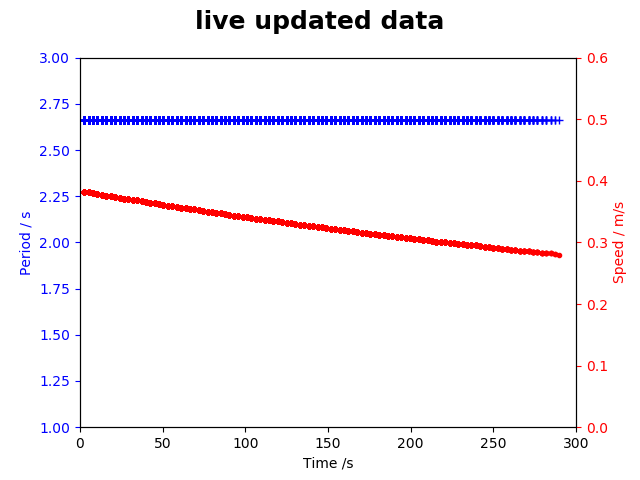

In [ ]:
#If you're not using Linux, you'll need to change this
#check the Arduino IDE to see what serial port it's attached to
ser = serial.Serial('/dev/ttyACM0', 115200)
# For a MAC, eg.
#ser = serial.Serial('/dev/cu.usbmodem1411', 115200)

view_time = 4 # seconds of data to view at once
duration = 300 # total seconds to collect data

fig, ax1 = plt.subplots()

xdata =   []
y1data =   [] 
y2data =   [] 

fig.suptitle('live updated data', fontsize='18', fontweight='bold')
ax1.set_xlabel('Time /s')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Period / s', color='b')
ax1.tick_params('y', colors='b')

xrange = [0,duration]
y1range = [1.0,3.0]
ax1.set_xlim(xrange)
ax1.set_ylim(y1range)

ax2 = ax1.twinx()
ax2.set_ylabel('Speed / m/s', color='r')
ax2.tick_params('y', colors='r')
y2range = [0.0,0.6]  # Addapt here
ax2.set_ylim(y2range)

#fig.tight_layout()
#plt.show()

plt.ion()
fig.show()
fig.canvas.draw()

ser.reset_input_buffer()
for i in range(2):  # ignore some lines, save last one
    line= ser.readline()
data = line.split(b',')
timeStart = float(data[0]); # in milli sec

#for i in range(20):
run = True
cycles =0
#collect the data and plot a moving frame
while run:    
    ser.reset_input_buffer()
    line= ser.readline()
    data = line.split(b',')
    #print(data)
    cycles +=1
    # sometimes the incoming data is garbage, so just 'try' to do this
    try:
        xdata.append((float(data[0]) - timeStart )/1000.0 ) 
        y1data.append((float(data[1])/1.0e6)) 
        y2data.append((0.057 * 1e6/float(data[2]))) 

        ax1.plot(xdata, y1data, 'b+')
        ax2.plot(xdata, y2data, 'r.')
        # when time's up, kill the collect+plot loop
        if xdata[-1] > duration: run=False
    # if the try statement throws an error, just do nothing
    except: 
        pass
    # update the plot
   
    fig.canvas.draw()
    fig.canvas.flush_events()

ser.close()  
fname = 'data_' + time.strftime("%Y%m%d-%H%M%S") + '.txt'
save_array=np.array([xdata, y1data , y2data])
np.savetxt(fname, save_array.transpose())
print('After  {0:d} cycles, average of Period is {1:.5f} +- {2:.5f}(s).'.format(cycles, \
                            np.average(y1data), np.std(y1data)))


In [53]:
#xdata, run 

#np.average(y1data)
#np.savetxt(fname, xdata)
a=np.array([xdata, y1data , y2data])
#a=np.array([[xdata], [y1data]])
np.savetxt(fname, a.transpose())

In [52]:
a.transpose()

    

array([[  2.664   ,   2.386308],
       [  5.33    ,   2.660088],
       [  7.995   ,   2.660172],
       [ 10.664   ,   2.659992],
       [ 13.339   ,   2.660088],
       [ 16.013   ,   2.660004],
       [ 18.688   ,   2.66038 ],
       [ 21.26    ,   2.659976],
       [ 23.935   ,   2.660232],
       [ 26.61    ,   2.660012],
       [ 29.284   ,   2.660292],
       [ 31.959   ,   2.659904],
       [ 34.634   ,   2.660044],
       [ 37.308   ,   2.660068],
       [ 39.881   ,   2.660048],
       [ 42.555   ,   2.660072],
       [ 45.23    ,   2.660588],
       [ 47.905   ,   2.660096],
       [ 50.579   ,   2.660124],
       [ 53.254   ,   2.6596  ],
       [ 55.93    ,   2.659956],
       [ 58.605   ,   2.660128],
       [ 61.176   ,   2.659984],
       [ 63.85    ,   2.660112],
       [ 66.526   ,   2.6599  ],
       [ 69.201   ,   2.66008 ],
       [ 71.876   ,   2.65996 ],
       [ 74.55    ,   2.660088],
       [ 77.225   ,   2.66    ],
       [ 79.797   ,   2.660028],
       [ 8

/usr/local/lib/python3.4/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


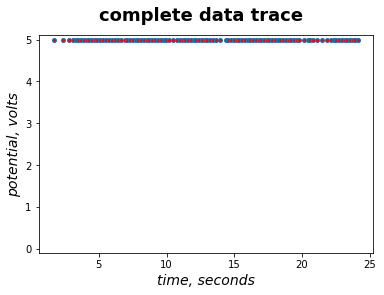

In [4]:
# plot all of the data you collected
fig2 = plt.figure()
# http://matplotlib.org/users/text_props.html
fig2.suptitle('complete data trace', fontsize='18', fontweight='bold')
plt.xlabel('time, seconds', fontsize='14', fontstyle='italic')
plt.ylabel('potential, volts', fontsize='14', fontstyle='italic')
#plt.axes().grid(True)

plt.plot(timepoints, ydata,marker='o',markersize=4,linestyle='none',markerfacecolor='red')
plt.ylim(yrange)
fig2.show()


#If you're not using Linux, you'll need to change this
#check the Arduino IDE to see what serial port it's attached to
ser = serial.Serial('/dev/ttyACM0', 115200)
#MAC
#ser = serial.Serial('/dev/cu.usbmodem1411', 115200)

#set plot to animated
plt.ion() 

start_time = time()
timepoints = []
ydata = [] 
yrange = [-0.1,5.1]
view_time = 4 # seconds of data to view at once
duration = 24 # total seconds to collect data

fig1 = plt.figure()
#http://matplotlib.org/users/text_props.html
fig1.suptitle('live updated data', fontsize='18', fontweight='bold')
plt.xlabel('time, seconds', fontsize='14', fontstyle='italic')
plt.ylabel('potential, volts', fontsize='14', fontstyle='italic')
#plt.axes().grid(True)
line1, = plt.plot(ydata,marker='o',markersize=4,linestyle='none',markerfacecolor='red')
plt.ylim(yrange)
plt.xlim([0,view_time])

#plt.show()

#flush any junk left in the serial buffer
ser.flushInput()
#ser.reset_input_buffer() # for pyserial 3.0+
run = True

#collect the data and plot a moving frame
while run:
    ser.reset_input_buffer()
    line= ser.readline()
    data = line.split(b',')
#data = ser.readline()
  
    # sometimes the incoming data is garbage, so just 'try' to do this
    try:
        # store the entire dataset for later
        ydata.append([float(data[1])*5.0/1024 ]) #, float(data[0])])
        timepoints.append(time()-start_time)
        current_time = timepoints[-1]
        
        # update the plotted data
        line1.set_xdata(timepoints)
        line1.set_ydata(ydata)
        
        # slide the viewing frame along
        if current_time > view_time:
            plt.xlim([current_time-view_time,current_time])
            
        # when time's up, kill the collect+plot loop
        if timepoints[-1] > duration: run=False
    
    # if the try statement throws an error, just do nothing
    except: pass
    
    # update the plot
    
    fig1.canvas.draw()
    fig1.canvas.flush_events()

ser.close()